In [2]:
source("common.R")

levels <- c("Activity not limited", "Activity limited a little", "Activity limited a lot")

df <-
  read_csv("data/tidy_ons_longcovid.csv", show_col_types = F)%>%
  filter("Index of Multiple Deprivation quintile group" == Domain)%>%
  mutate(`Impact on daily activity` = as.factor(`Impact on daily activity`))%>%
  mutate(`Impact on daily activity` = factor(`Impact on daily activity`, levels = levels))

df%>%
  head()

Impact on daily activity,Domain,Group,Estimate,Lower 95% confidence limit,Upper 95% confidence limit,filename,Unit,Week Ending Date,midpoint_date
<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<date>,<date>
Activity not limited,Index of Multiple Deprivation quintile group,1,0.62,0.52,0.73,data/longcovid1920230330accessible.xlsx,Percent,2023-03-05,2023-02-19
Activity not limited,Index of Multiple Deprivation quintile group,2,0.59,0.51,0.66,data/longcovid1920230330accessible.xlsx,Percent,2023-03-05,2023-02-19
Activity not limited,Index of Multiple Deprivation quintile group,3,0.64,0.57,0.71,data/longcovid1920230330accessible.xlsx,Percent,2023-03-05,2023-02-19
Activity not limited,Index of Multiple Deprivation quintile group,4,0.60,0.53,0.67,data/longcovid1920230330accessible.xlsx,Percent,2023-03-05,2023-02-19
Activity not limited,Index of Multiple Deprivation quintile group,5,0.59,0.53,0.65,data/longcovid1920230330accessible.xlsx,Percent,2023-03-05,2023-02-19
Activity limited a little,Index of Multiple Deprivation quintile group,1,2.24,2.03,2.45,data/longcovid1920230330accessible.xlsx,Percent,2023-03-05,2023-02-19


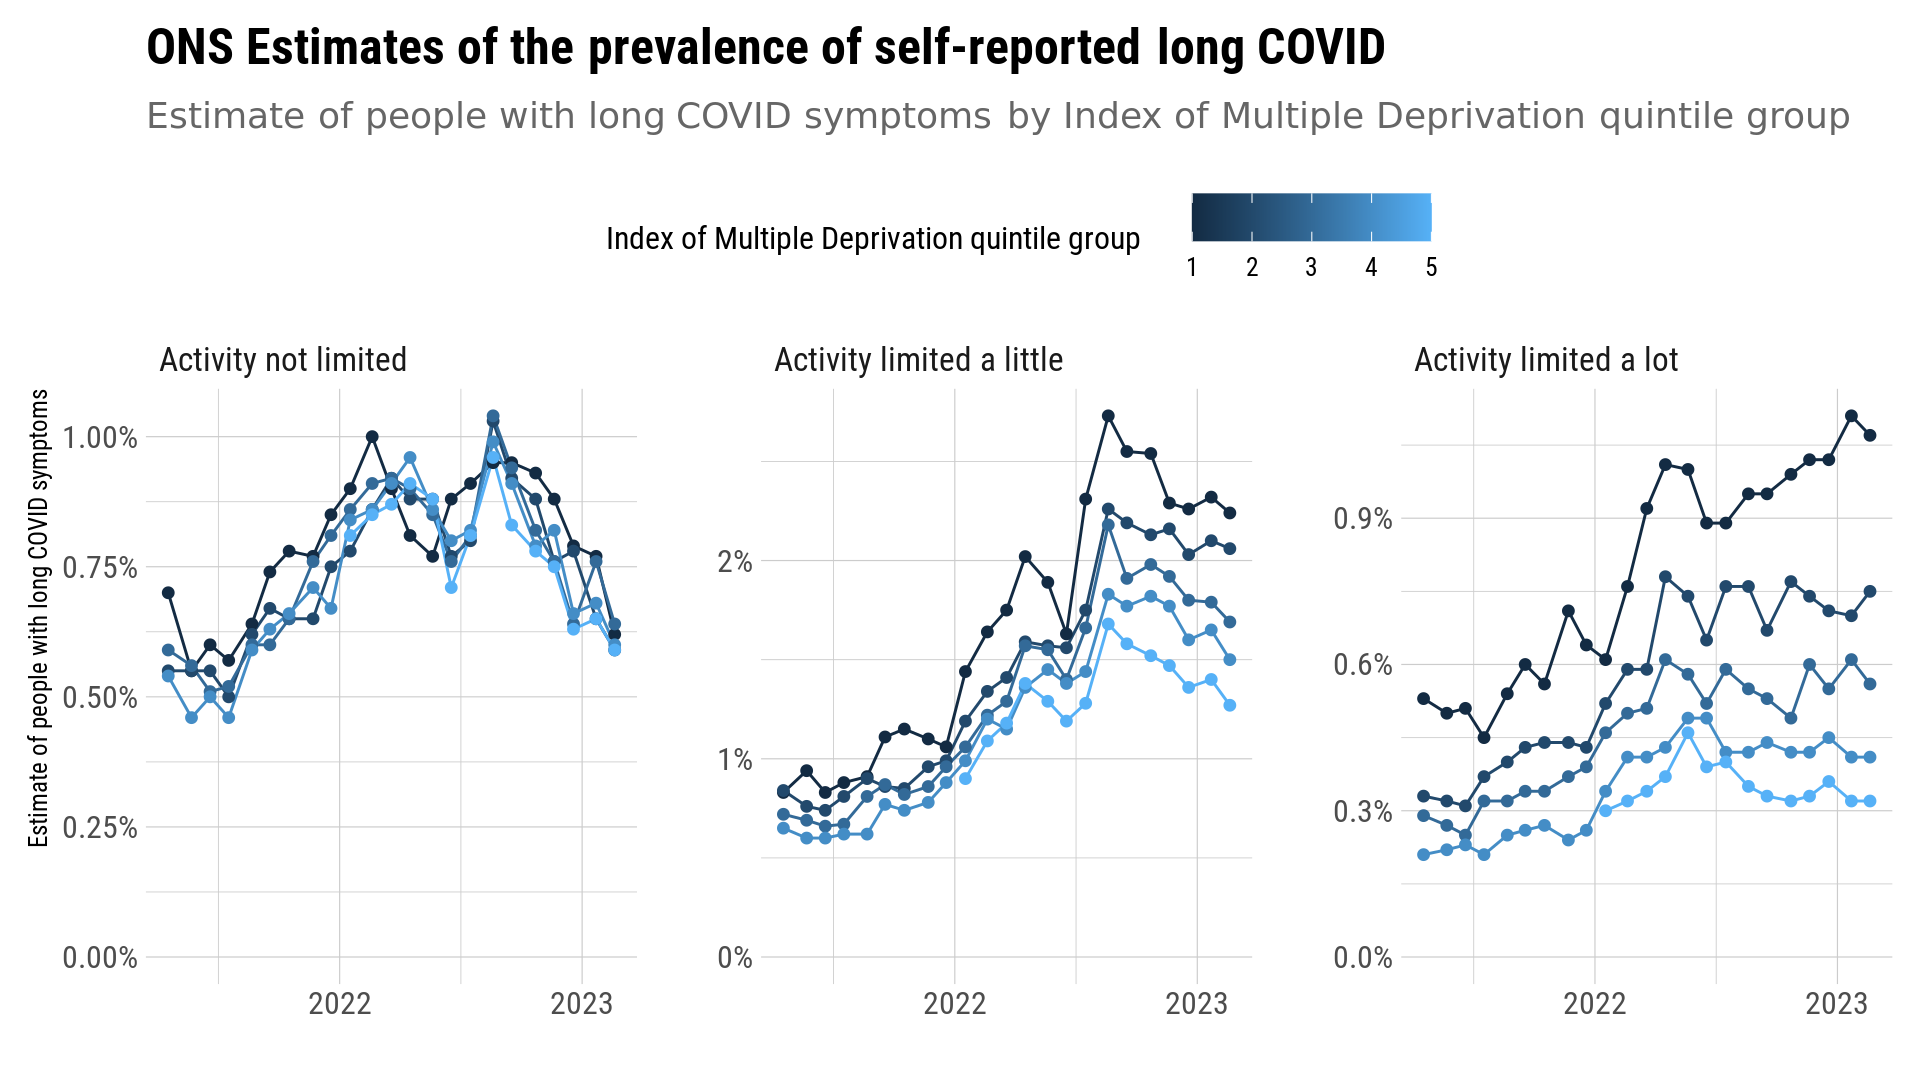

In [3]:
s = 1.2
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  mutate(group = parse_number(Group))%>%
  ggplot(aes(x = midpoint_date, y = Estimate, color = group, group = group)) +
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimate of people with long COVID symptoms by Index of Multiple Deprivation quintile group",
       y = "Estimate of people with long COVID symptoms",
       x = "", y = "", color = "Index of Multiple Deprivation quintile group") +
  geom_line() +
  geom_point() +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::percent_format(scale = 1), limits = c(0, NA)) +
  facet_wrap(~`Impact on daily activity`, scale = "free_y") +
  theme(legend.position = "top")

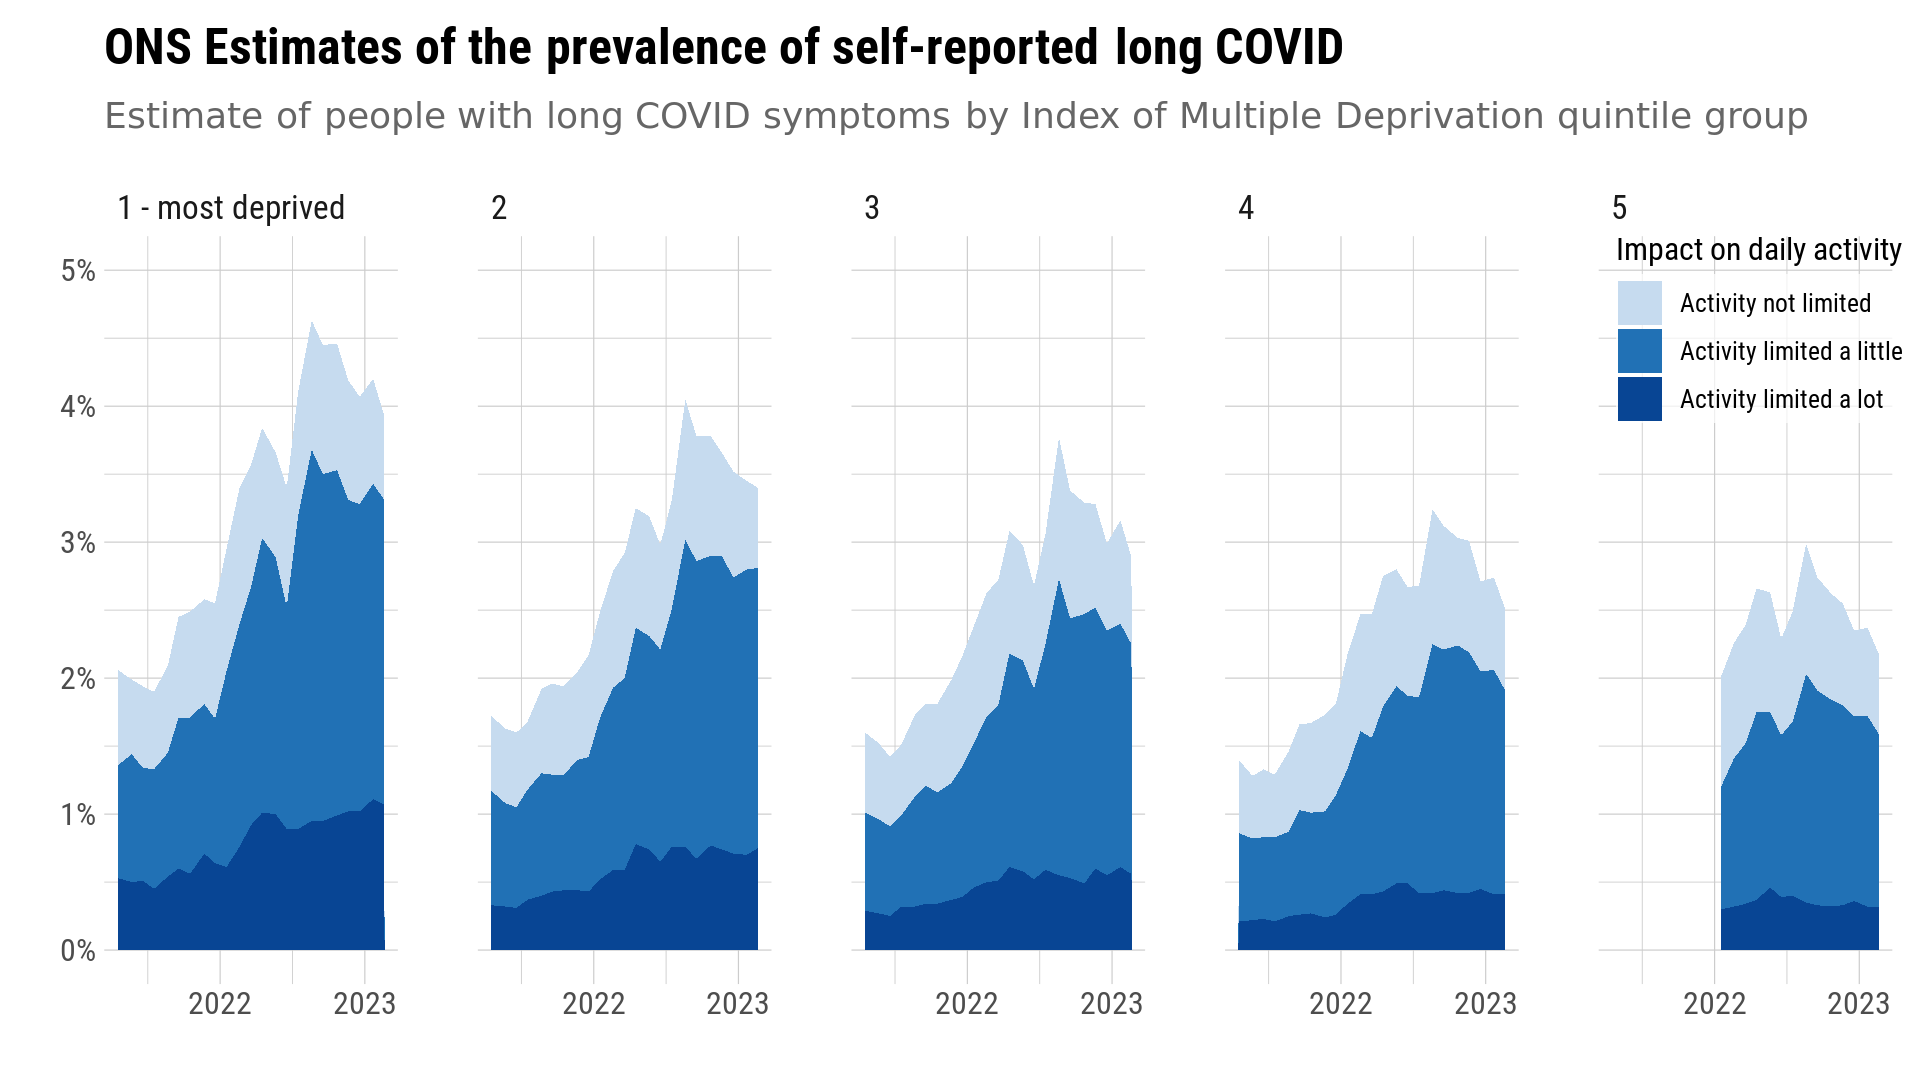

In [4]:
s = 1.2
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  mutate(group = parse_number(Group))%>%
  mutate(gg = ifelse(group==1, "1 - most deprived", as.character(group)))%>%
  ggplot(aes(x = midpoint_date, y = Estimate, fill = `Impact on daily activity`)) +
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimate of people with long COVID symptoms by Index of Multiple Deprivation quintile group",
       x = "", y = "", color = "Index of Multiple Deprivation quintile group") +
  geom_area() +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::percent_format(scale = 1), limit = c(0, 5)) +
  scale_fill_manual(values = c('#C6DBEF',  '#2171B5', '#084594')) +
  facet_wrap(~gg, scale = "fixed", nrow = 1) +
  theme(legend.position = c(.93, .85),
        legend.margin = margin(t = -.5, unit='cm'),
        legend.box.background = element_rect(fill = alpha("white", 0.7),
            colour = NA))